In [53]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import os, re, pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#%matplotlib inline

#1. PCA Analysis
DATA_SET_DIR = '../DATA/DATA_SET'
FILE_END = '.bed.csv'
DATA_TYPE = {'MAX': '_K_max', 'MIN': '_K_min', 'METHY': '_methylation'}
K_LEN = [3]
INDEX_NAME = 'Indexs'
INDEX_DIR = os.path.join(DATA_SET_DIR, INDEX_NAME)
CHROMOSOMES = [str(i) for i in range(1, 23)]
CLASSES = [0,1,2,3]
CLASSES_LABELS = ['NON', 'Ecto DMR', 'Endo DMR', 'Meso DMR']
COLORS = ['r', 'b', 'b', 'b']

In [49]:
def pca_analysis(data_dir, k_len, data_type, chr_i):
    input_fp = os.path.join(data_dir, str(k_len), str(k_len) + DATA_TYPE[data_type], 'chr' + chr_i + ".csv")
    data_pd = pd.read_csv(input_fp, sep=',', header=None).values.astype(float)
    S_COL = 2
    COL_INDEXS = [i for i in range(S_COL, S_COL + 2* k_len)] if data_type == 'METHY' else list(np.array([[S_COL, S_COL + k_len, S_COL + 2 * k_len] for i in range(0,k_len)]).flatten())
    x = data_pd[:, COL_INDEXS]
    #x = StandardScaler().fit_transform(x)
    y = data_pd[:, -1]
    pca = PCA(n_components=2)
    pc = pca.fit_transform(x)
    return [pc, y]

In [59]:
OUT_DIR = '../DATA/MINI_DATA_SET'
[pc, y] = pca_analysis(OUT_DIR, 5, 'MIN', '1')

In [60]:
def plot_pca(pc, y):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title('2 component PCA', fontsize=20)
    for target, color in zip(CLASSES, COLORS):
        indexs = y == target
        ax.scatter(pc[indexs, 0], pc[indexs, 1], c=color, s=50)
    ax.legend(CLASSES_LABELS)
    ax.grid()

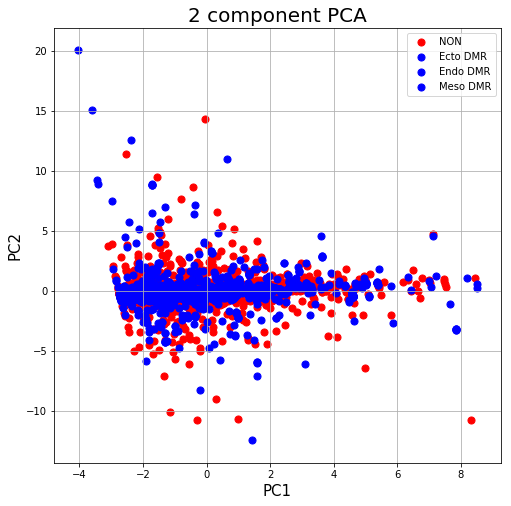

In [61]:
plot_pca(pc, y)